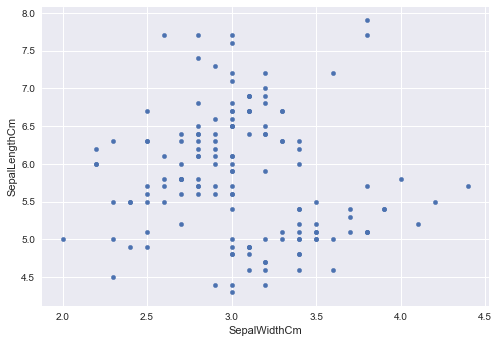

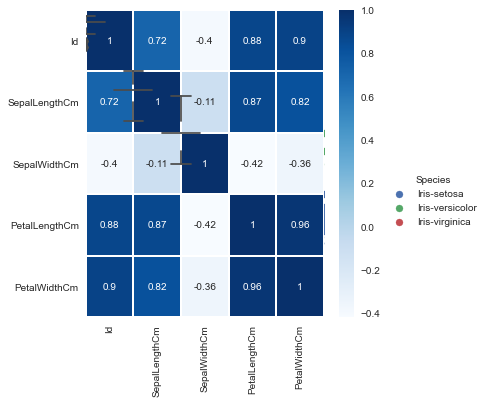

(105, 3)
(105,)
(45, 3)
(45,)
Training Score:  1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.83      0.88      0.86        17
 Iris-virginica       0.83      0.77      0.80        13

       accuracy                           0.89        45
      macro avg       0.89      0.88      0.89        45
   weighted avg       0.89      0.89      0.89        45

0.8888888888888888
[[15  0  0]
 [ 0 15  2]
 [ 0  3 10]]
['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'I

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# ## Importing the Dataset 
df = pd.read_csv("D:/sjc/sem3/letsgrowmore/iris.csv")

df.head()

# ## Create the target Variable

df['Species'].value_counts()
df.shape

df.value_counts()

df.isnull().any()


# In[13]:


df.columns


# In[14]:


df.dtypes


# In[16]:


df.Id.unique().shape


# In[17]:


df.corr()


# ## Data Visualization

# In[18]:


df.plot(kind='scatter', y='SepalLengthCm', x='SepalWidthCm')
plt.show()


# In[23]:


plt.style.use('seaborn')
sns.FacetGrid(df,hue='Species',height=5).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()


# In[24]:


# In[26]:


sns.boxplot(x="Species", y="PetalWidthCm", data=df)

# In[27]:


sns.heatmap(df.corr(),cmap='Blues',annot=True,linewidths=1)
plt.show()


# In[28]:


df = df.copy()
x = df.iloc[:,1:4]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=43)


# In[30]:


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


# ## Decision Tree Algorithm

# In[32]:


from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)


# In[33]:


print("Training Score: ",clf.score(x_train,y_train))


# In[34]:


print(classification_report(y_test,y_pred))


# In[35]:


print(accuracy_score(y_test,y_pred))


# In[36]:


print(confusion_matrix(y_test,y_pred))


# In[ ]:


data = {'y_Actual': y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data)
df.reset_index(inplace = True, drop = True)
df.head()


# ## Making predictions on the Test dataset

# In[37]:


predic=clf.predict(x_test) 
print(predic)





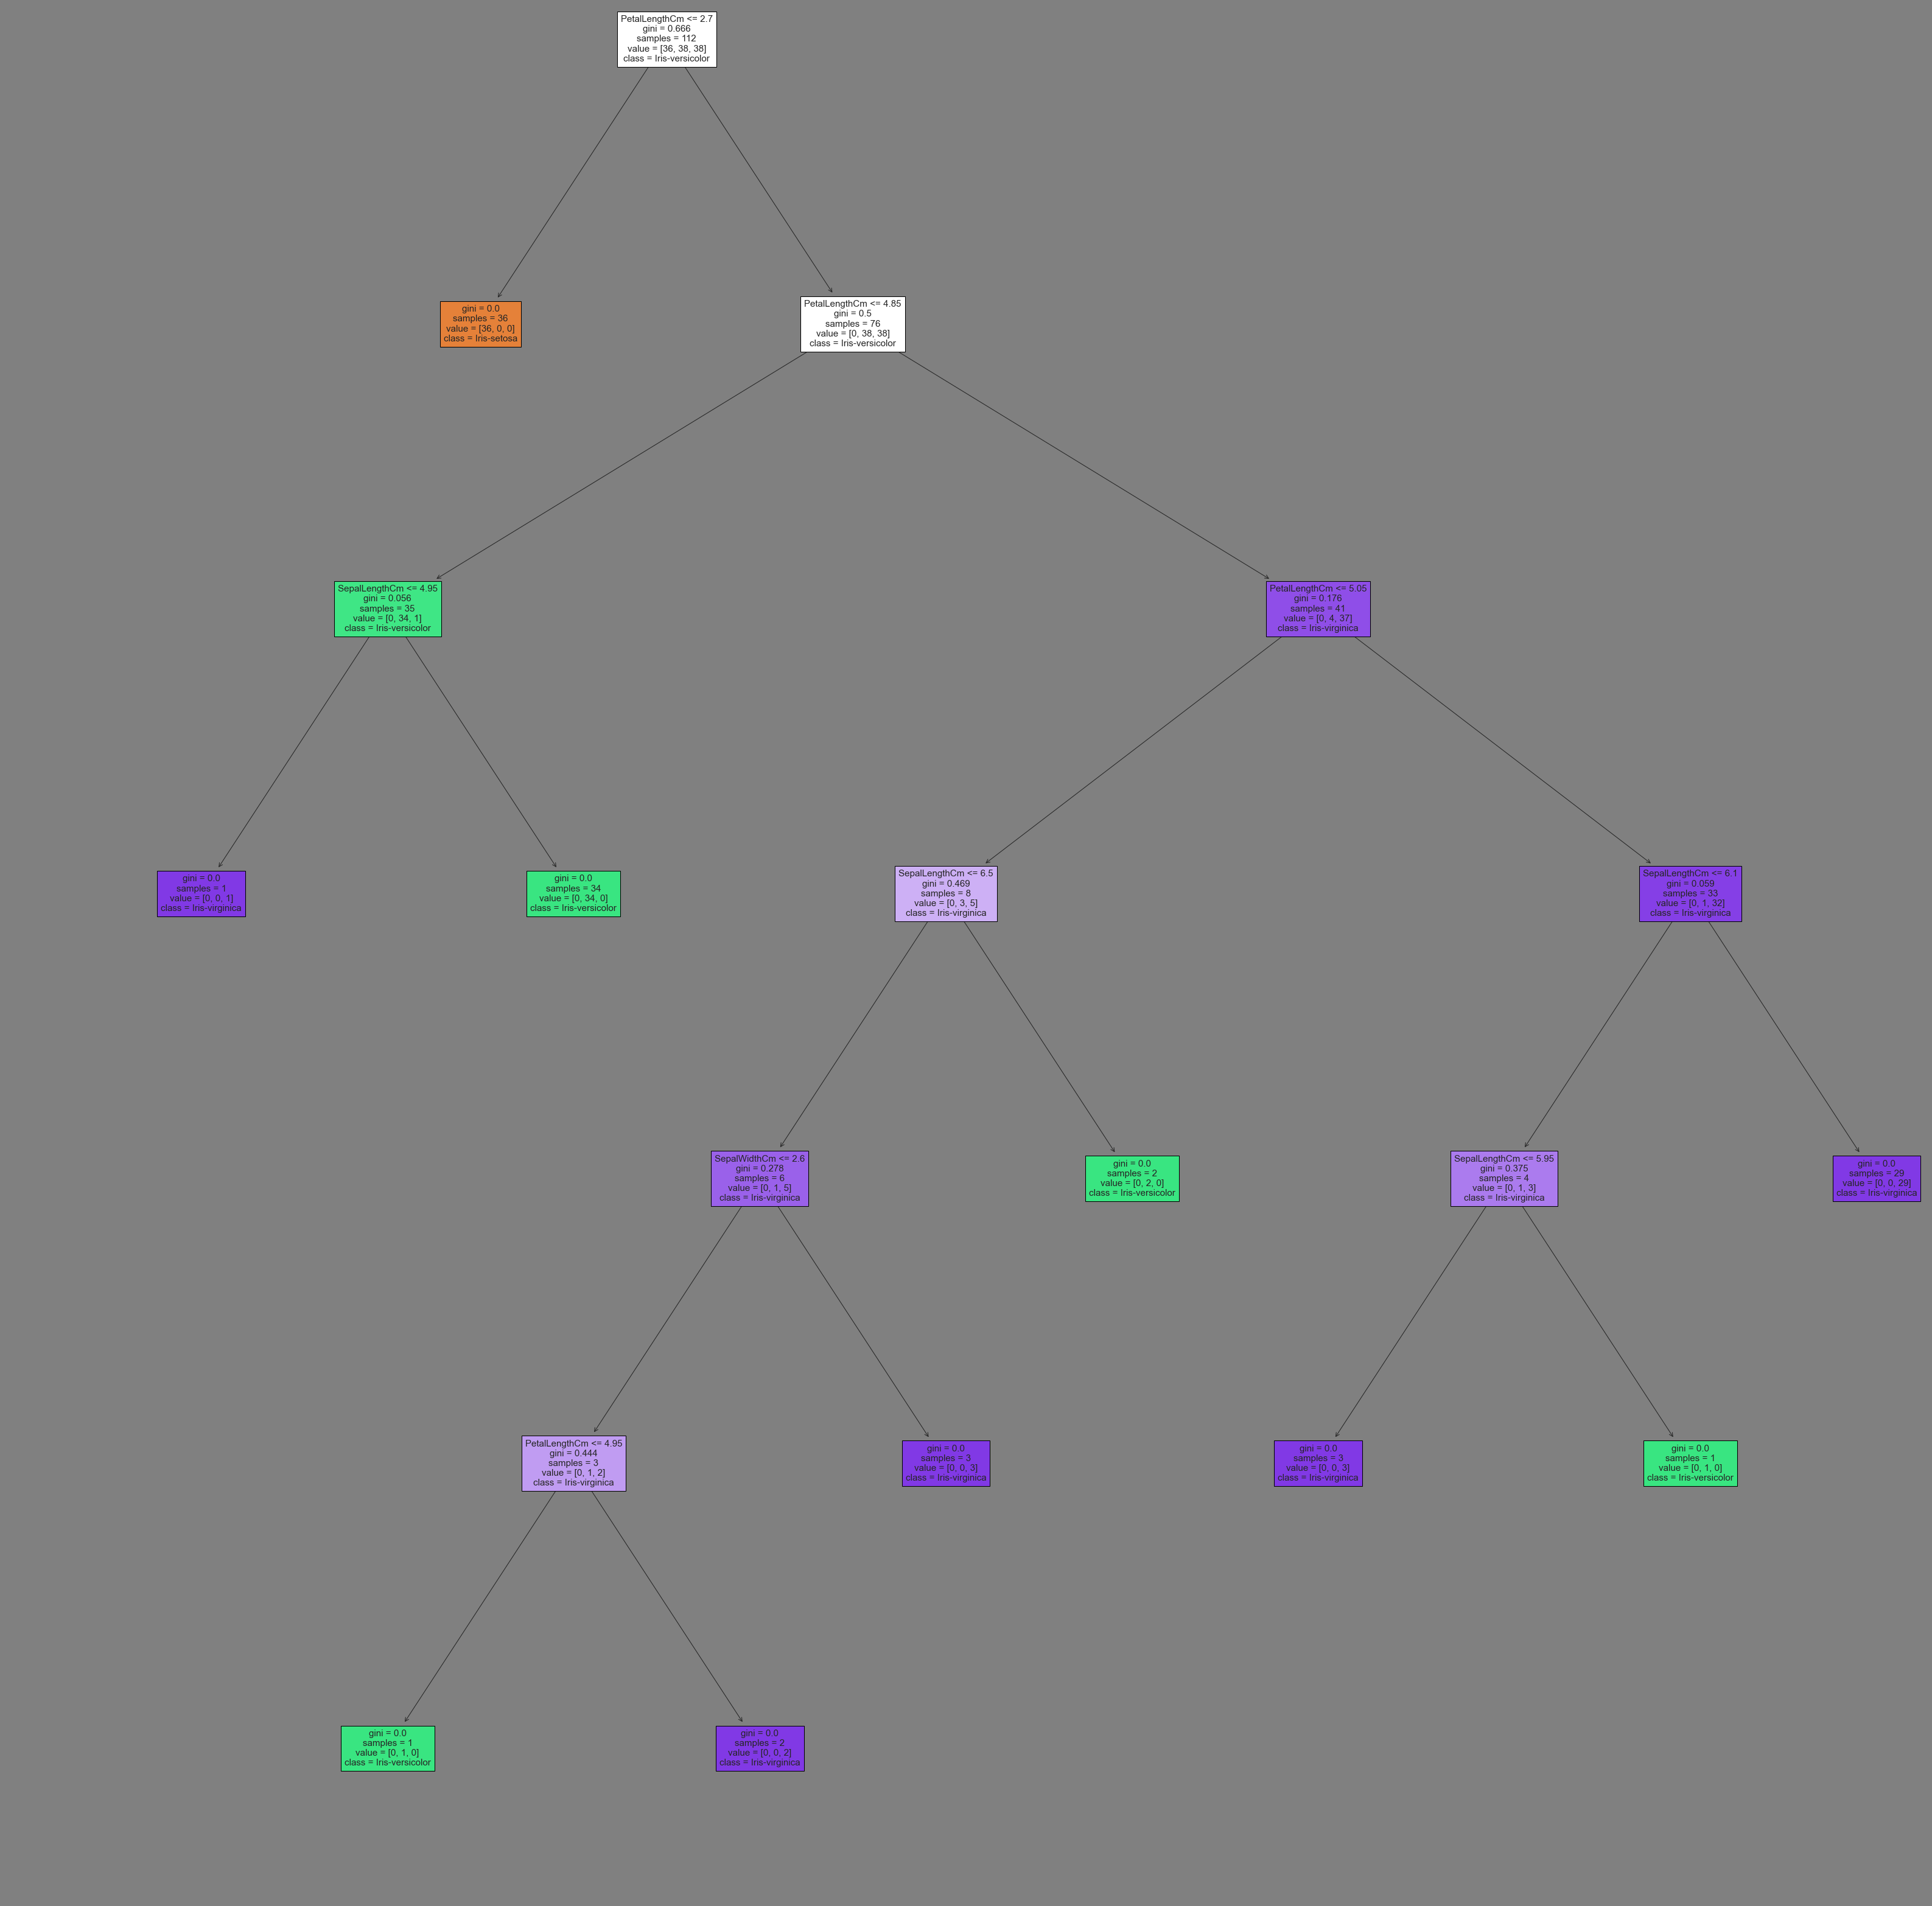

In [2]:
from sklearn import tree
feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=250,facecolor='grey')
tree.plot_tree(clf,feature_names=feature_names,class_names=class_names,filled=True);
fig.savefig('IrisTree.png')